<a href="https://colab.research.google.com/github/PreetiKumari2208/WEB_D-and-ML-projects/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Taken a dataset containing information about housing prices, including features such as the number of bedrooms,
# square footage, location, etc. Build linear regression model to predict the house prices based on these features.
#Steps: EDA------Data Preprocessing: Load the dataset and inspect the first few rows. Handle missing data (if any) by filling or dropping.
# Normalize/standardize the numerical columns to prepare the data for modeling.checking and fixing outliers .
# Model Training: Split the dataset into training and testing sets (80% training, 20% testing). Train a linear regression model using the training data. Model Evaluation: Evaluate the performance of the model on the test data using metrics such as Mean Squared Error (MSE) and R-squared (R²).
#Plot the actual vs. predicted prices for the test set. Provide a brief analysis of the model's performance and suggest potential improvements

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
df=pd.read_csv('Housing.csv')

In [ ]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
181,5215000,7200,3,1,2,yes,yes,yes,no,no,1,yes,furnished
60,7140000,6000,3,2,2,yes,yes,no,no,no,1,no,semi-furnished
359,3710000,3600,3,1,1,yes,no,no,no,no,1,no,unfurnished
214,4865000,4350,2,1,1,yes,no,yes,no,no,0,no,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.shape

(545, 13)

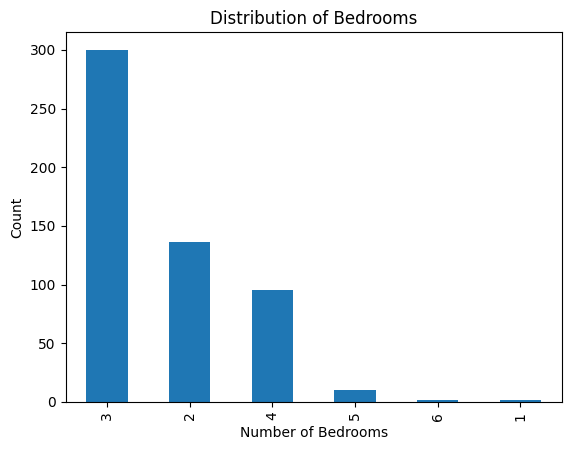

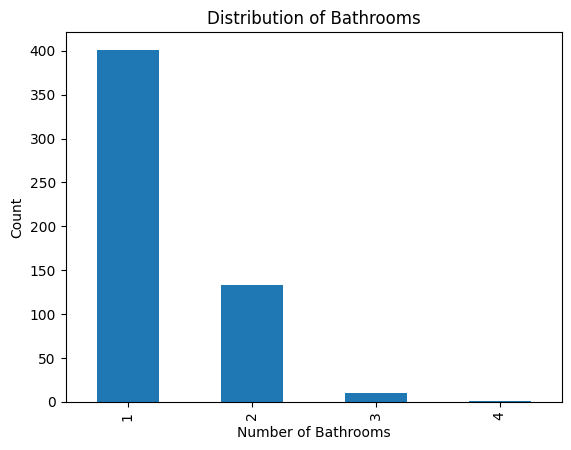

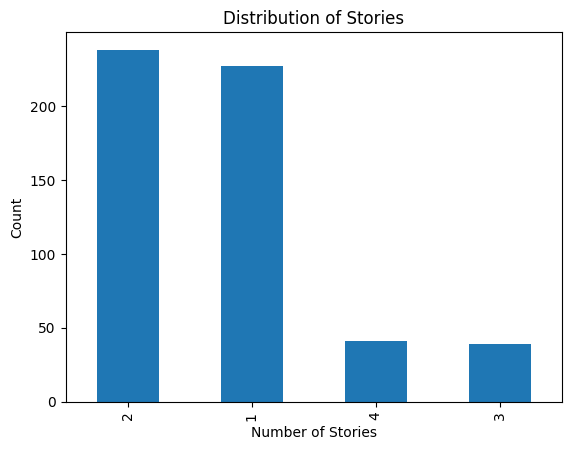

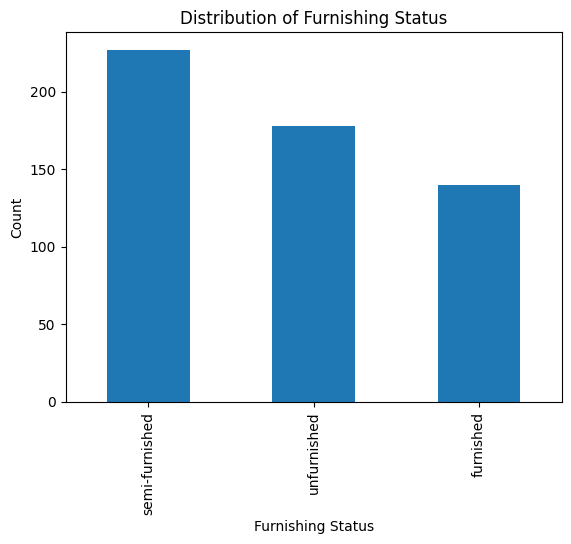

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

bedroom_counts = df['bedrooms'].value_counts().plot(kind='bar') # Use plot(kind='bar')
plt.xlabel("Number of Bedrooms")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.title("Distribution of Bedrooms") # Add title
plt.show() # Display the plot
bathroom_counts = df['bathrooms'].value_counts().plot(kind='bar')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.title("Distribution of Bathrooms")
plt.show()
stories_counts = df['stories'].value_counts().plot(kind='bar')
plt.xlabel("Number of Stories")
plt.ylabel("Count")
plt.title("Distribution of Stories")
plt.show()
furnishing_counts = df['furnishingstatus'].value_counts().plot(kind='bar')
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.title("Distribution of Furnishing Status")
plt.show()


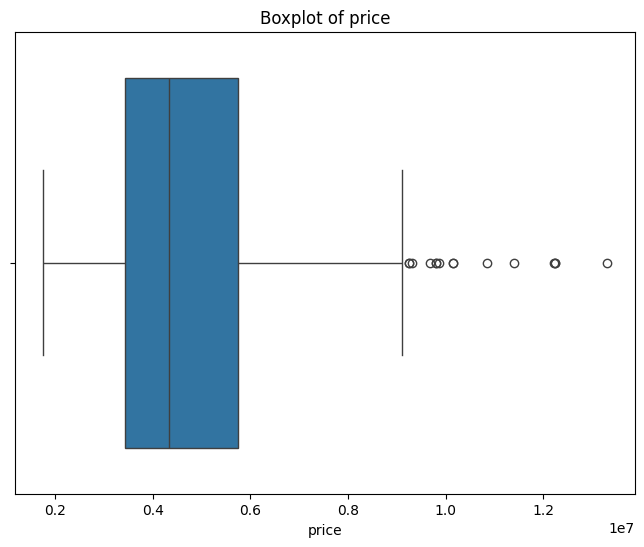

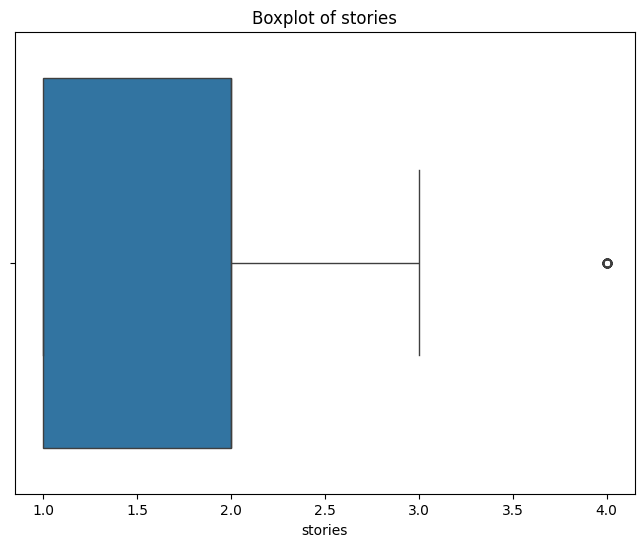

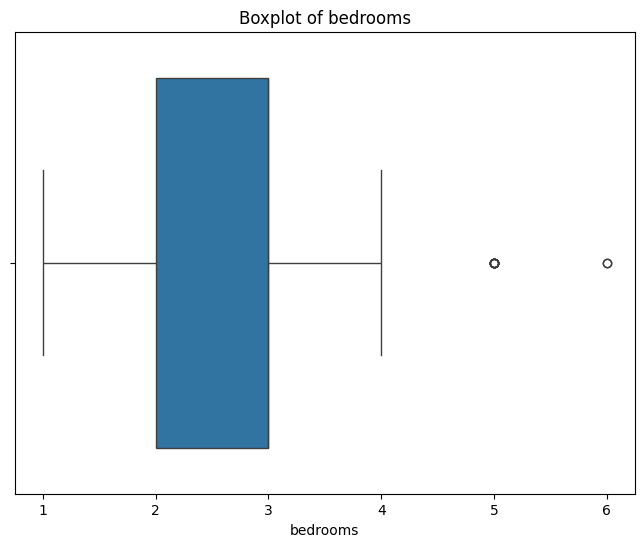

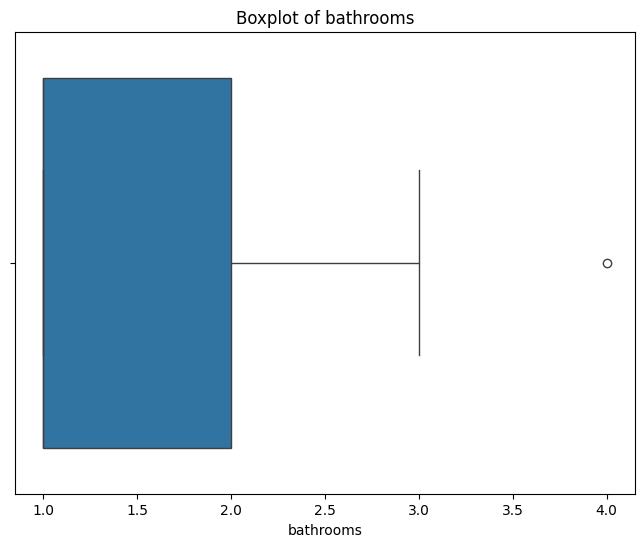

In [ ]:
#-----------checking outliers------------------------
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = ['price', 'stories', 'bedrooms','bathrooms']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
#----------6 outliers in the dataset---------------------

# import numpy as np
# from scipy import stats

# df['price_Z_score']=(df.price - df.price.mean())/df.price.std()
# df[(df.price_Z_score<-3)|(df.price_Z_score>3)]

# df2 = df[(df.price_Z_score <= 3) & (df.price_Z_score >= -3)]

# df2 = df2.drop(columns=['price_Z_score'])
# df2

In [ ]:
#----one hot encoding increases multicollinearity--------
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
#--------------checking dependent features-------------------------
# (correlation )
numerical_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_columns].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)


high_corr_features = correlation_matrix[abs(correlation_matrix) > 0.8]
print("\nHighly Correlated Features (Correlation > 0.8):\n", high_corr_features)


Correlation Matrix:
                      price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefar

In [ ]:
X=df.drop(['price'],axis=1)
Y=df['price']

In [ ]:
print(X)
print("print output column",Y)

print(X.shape)
print(Y.shape)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

# Standardize numerical features

from sklearn.preprocessing import StandardScaler

numerical_cols = ['stories', 'bedrooms', 'bathrooms', 'area']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

scaler_Y = StandardScaler()

y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_Y.transform(y_test.values.reshape(-1, 1))

# Linear Regression model
model = LinearRegression()

from sklearn.model_selection import train_test_split, cross_val_score

# 5. Perform cross-validation ----5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# negative MSE to positive MSE
mse_scores = -cv_scores

#  analyze the cross-validation scores
print("Cross-Validation MSE Scores:", mse_scores)
print("Average MSE:", mse_scores.mean())


model.fit(X_train, y_train)

Cross-Validation MSE Scores: [0.45405001 0.30367954 0.3363813  0.43537638 0.33195183]
Average MSE: 0.3722878117792818


LinearRegression()

Mean Squared Error (MSE): 0.34167602195314256
R-squared (R²): 0.6583239780468575


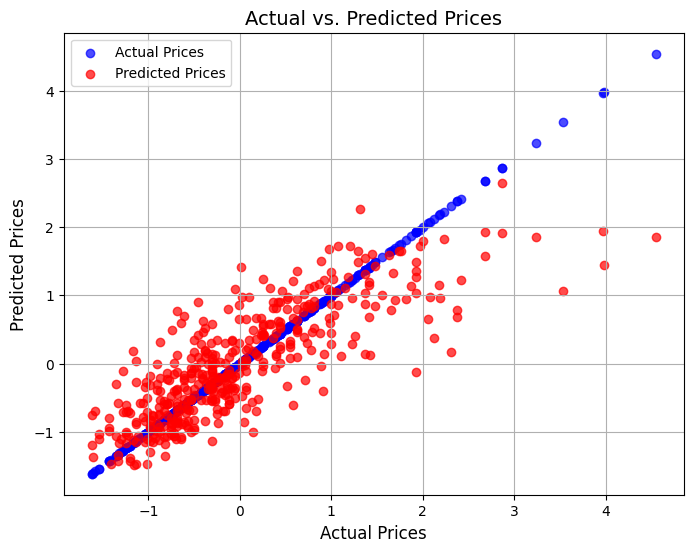

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


y_train_pred = model.predict(X_train)

#  (MSE)
mse = mean_squared_error(y_train, y_train_pred)

# (R²)
r2 = r2_score(y_train, y_train_pred)

#  evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train, alpha=0.7, color='blue', label='Actual Prices')
plt.scatter(y_train, y_train_pred, alpha=0.7, color='red', label='Predicted Prices')
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual vs. Predicted Prices", fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [ ]:
#---------------test dataset--------------------------------
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

# evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.22989494559236406
R-squared (R²): 0.7624579467323476


## **testing:**
# Mean Squared Error (MSE): 0.22989494559236406
# R-squared (R²): 0.7624579467323476
# ------- MSE AND R-Squared---------------scope of improvement---------------------


# 1) high bias --- model is undefited ----------as MSE value is  0.22989494559236406
#   methods to improve performance:

#   large amount of dataset and having diversity in data
#   feature engineering can be done  ---creating more significant features --
#    hyperparameter tunning

# 2) minimum variance ----------model is not overfitted

# getting more deviations in larger and minimum price value prices ---- (as R^2 value is .76 ,but it should be closed to 1)
